In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [5]:
yearly = pd.read_csv(r"C:\Users\Lenovo\Python\Dr. Semmelweis and the Discovery of Handwashing\yearly_deaths_by_clinic.csv")

In [6]:
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


In [7]:
yearly['proportion_deaths'] = yearly.deaths/yearly.births

In [8]:
yearly1 = yearly[yearly['clinic'] == 'clinic 1']
yearly2 = yearly[yearly['clinic'] == 'clinic 2']

In [9]:
print(yearly1)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464


In [10]:
print(yearly2)

    year  births  deaths    clinic  proportion_deaths
6   1841    2442      86  clinic 2           0.035217
7   1842    2659     202  clinic 2           0.075968
8   1843    2739     164  clinic 2           0.059876
9   1844    2956      68  clinic 2           0.023004
10  1845    3241      66  clinic 2           0.020364
11  1846    3754     105  clinic 2           0.027970


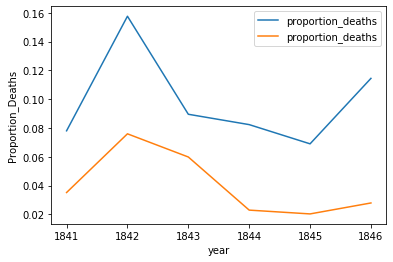

In [14]:
ax = yearly1.plot(x = 'year', y = 'proportion_deaths', label = "proportion_deaths")
ax.set_ylabel("Proportion_Deaths")
yearly2.plot(x = 'year', y = 'proportion_deaths', label = "proportion_deaths", ax = ax)

In [20]:
monthly = pd.read_csv(r'C:\Users\Lenovo\Python\Dr. Semmelweis and the Discovery of Handwashing\monthly_deaths.csv')

In [21]:
monthly["proportion_deaths"] = monthly['deaths']/monthly['births']

In [22]:
print(monthly)

          date  births  deaths  proportion_deaths
0   1841-01-01     254      37           0.145669
1   1841-02-01     239      18           0.075314
2   1841-03-01     277      12           0.043321
3   1841-04-01     255       4           0.015686
4   1841-05-01     255       2           0.007843
..         ...     ...     ...                ...
93  1848-11-01     310       9           0.029032
94  1848-12-01     373       5           0.013405
95  1849-01-01     403       9           0.022333
96  1849-02-01     389      12           0.030848
97  1849-03-01     406      20           0.049261

[98 rows x 4 columns]


In [23]:
print(monthly.head(1))

         date  births  deaths  proportion_deaths
0  1841-01-01     254      37           0.145669


Text(0, 0.5, 'Proportion deaths')

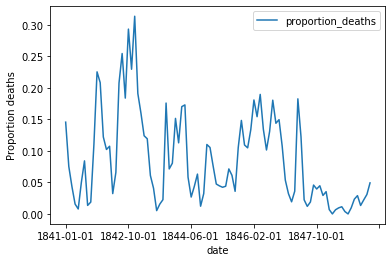

In [24]:
ax = monthly.plot(x = 'date', y = 'proportion_deaths', label = 'proportion_deaths')
ax.set_ylabel("Proportion deaths")

In [43]:
monthly['date'] =pd.to_datetime(monthly['date'], format = '%Y-%m-%d')

In [44]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               98 non-null     datetime64[ns]
 1   births             98 non-null     int64         
 2   deaths             98 non-null     int64         
 3   proportion_deaths  98 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.2 KB


In [45]:
handwashing_start = pd.to_datetime('1847-06-01')

In [46]:
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]

In [48]:
before_washing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 75
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               76 non-null     datetime64[ns]
 1   births             76 non-null     int64         
 2   deaths             76 non-null     int64         
 3   proportion_deaths  76 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.0 KB


In [49]:
after_washing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 76 to 97
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               22 non-null     datetime64[ns]
 1   births             22 non-null     int64         
 2   deaths             22 non-null     int64         
 3   proportion_deaths  22 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 880.0 bytes


Text(0, 0.5, 'Proportion deaths')

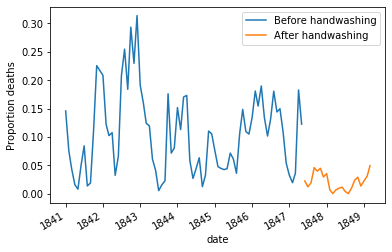

In [51]:
ax = before_washing.plot(x="date", y="proportion_deaths",
                         label="Before handwashing")
after_washing.plot(x="date", y="proportion_deaths",
                   label="After handwashing", ax=ax)
ax.set_ylabel("Proportion deaths")

In [52]:
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.0839566075118334

In [53]:
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

In [54]:
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.101037
0.975   -0.066812
dtype: float64

In [55]:
doctors_should_wash_their_hands = True